# Đồ án cuối kì - Nhập môn khoa học dữ liệu
### Nhóm 16


## 1. Thu thập dữ liệu

Khai báo thư viện

In [1]:
import sys
sys.executable

import pycountry_convert as pc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# remove warnings
import warnings
warnings.simplefilter('ignore')


#!pip install geopandas
#!pip install folium
import geopandas
import folium

## 2. Tiền xử lý và khám phá dữ liệu

### Đọc dữ liệu, bỏ cột Cause type

In [2]:
df = pd.read_csv('data.csv')
display(df.head())
print(df.shape)

,Cause of death,Age,Year,Country,Number of deaths
0,HIV/AIDS,0,2020,Albania,NaN
1,HIV/AIDS,0,2020,Antigua and Barbuda,NaN
2,HIV/AIDS,0,2020,Argentina,NaN
3,HIV/AIDS,0,2020,Armenia,NaN
4,HIV/AIDS,0,2020,Australia,0


(262752, 5)


### Mỗi dòng có ý nghĩa gì? 

Mỗi dòng số lượng người mất do một nguyên nhân, ở một quốc gia trong một năm với một nhóm tuổi nhất định

### Dữ liệu có các dòng bị lặp không?

Ta sẽ kiểm tra vụ này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược.

In [3]:
have_duplicated_rows=len(df.index)-len(df.index.drop_duplicates())
assert have_duplicated_rows == False

Kết quả kiểm tra cho thấy không có dòng nào là bị trùng lắp dữ liệu cả.

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả thông tin về các cột trong file "raw_data.csv" mà nhóm đã lấy về được:
- **Cause of death**: Tên các loại dịch bệnh.
- **Age**: Nhóm tuổi tử vong.
- **Year**: Năm thu thập thông tin.
- **Country**: Quốc gia lấy thông tin.
- **Number of deaths**: Số lượng tử vong.

Khoảng biểu diễn các cột dữ liệu

In [4]:
display(df['Cause of death'].unique())
print("Số lượng các giá trị khác nhau:" ,df['Cause of death'].nunique())

array(['HIV/AIDS', 'Malaria', 'Tuberculosis', 'Dengue', 'Covid-19',
       'Brain and nervous system cancers', 'Leukaemia',
       'Road traffic accidents', 'Fires', 'Drownings',
       'Natural disasters', 'Self-inflicted injuries', 'Violence', 'War'],
      dtype=object)

Số lượng các giá trị khác nhau: 14


In [5]:
display(df['Age'].unique())
print("Số lượng các giá trị khác nhau:" ,df['Age'].nunique())

array(['0', '1-4', '5-14', '15-24', '25-34', '35-54', '55-74', '75+'],
      dtype=object)

Số lượng các giá trị khác nhau: 8


In [6]:
display(df['Year'].unique())
print("Số lượng các giá trị khác nhau:" ,df['Year'].nunique())

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000],
      dtype=int64)

Số lượng các giá trị khác nhau: 21


In [7]:
display(df['Country'].unique())
print("Số lượng các giá trị khác nhau:" ,df['Country'].nunique())

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Cabo Verde', 'Canada', 'Chile',
       'China, Hong Kong SAR', 'Colombia', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana',
       'Hungary', 'Iceland', 'Iran (Islamic Republic of)', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Martinique',
       'Mauritius', 'Mayotte', 'Mexico', 'Mongolia', 'Montenegro',
       'Netherlands', '

Số lượng các giá trị khác nhau: 113


In [8]:
df['Number of deaths'].describe()

count     207240
unique      3900
top            0
freq       95353
Name: Number of deaths, dtype: object

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Ta lấy `dtype` (kiểu dữ liệu của mỗi phần tử) của mỗi cột trong dữ liệu và lưu kết quả vào series `col_dtypes`; series này có index là tên cột. 

In [9]:
col_dtypes = pd.Series(df.dtypes,index = df.columns)
display(col_dtypes)

Cause of death      object
Age                 object
Year                 int64
Country             object
Number of deaths    object
dtype: object

### Tiền xử lý dữ liệu

**Vấn đề cần tiền xử lý:**

- Cột "Year" đang có dtype là `int64`. Để có thể tiếp tục khám phá thêm về cột này, ta sẽ thực hiện bước tiền xử lý là chuyển sang dạng `datetime`.

In [10]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [11]:
assert df.dtypes['Year']==np.dtype('datetime64[ns]')

In [12]:
# Năm bắt đầu thu thập dữ liệu
min_Year=df['Year'].dt.year.min()
# Năm mới nhất thu thập dữ liệu
max_Year=df['Year'].dt.year.max()
print("min_Year: ",min_Year)
print("max_Year: ",max_Year)

min_Year:  2000
max_Year:  2020


- Cột "Number of deaths" đang có dtype là `object`. Trong Pandas, kiểu dữ liệu `object` thường ám chỉ chuỗi, nhưng thật ra kiểu dữ liệu `object` có thể chứa một đối tượng bất kỳ trong Python (vì thật ra ở bên dưới kiểu dữ liệu `object` chứa địa chỉ). Nếu một cột trong dataframe có `dtype` là `object` thì có thể các phần tử trong cột này sẽ có kiểu dữ liệu khác nhau.

Ta xem chi tiết kiểu dữ liệu cột `Number of deaths`

In [13]:
def open_object_dtype(s):
    dtypes = set()
    
    # YOUR CODE HERE
    dtypes = set(s.apply(lambda x: type(x)))
    
    return dtypes

In [14]:
open_object_dtype(df['Number of deaths'])

{float, str}

Cột `Number of deaths`, ta tiến hành thay các giá trị bị thiếu thành 0 và đổi kiểu dữ liệu thành `int64`.

In [15]:
#Xóa khoảng trắng giữa các giá trị cột Number of deaths, ví dụ 1 084 -> 1084
df['Number of deaths'] = df['Number of deaths'].str.replace(' ', '')
df['Number of deaths']=df['Number of deaths'].fillna(value=0.0).astype('int64')

In [16]:
col_dtypes = pd.Series(df.dtypes,index = df.columns)
display(col_dtypes)

Cause of death              object
Age                         object
Year                datetime64[ns]
Country                     object
Number of deaths             int64
dtype: object

#### Chia 'Number of deaths' theo 'Cause death' và gom nhóm theo 'Country', 'Year' và 'Age'
- Thay các giá trị Nan bằng giá trị 0 vì Nan hay cũng đều không có ý nghĩa cho thống kê dữ liệu, thay thế để dễ dàng có các bước trả lời câu hỏi hơn.

In [17]:
cause_death = df['Cause of death'].unique() # danh sách cause death
df = pd.pivot_table(df, values='Number of deaths', index=['Country', 'Year', 'Age'], columns=['Cause of death'], aggfunc=np.sum, fill_value=0).reset_index()
df = df.rename_axis(None, axis=1)
display(df.head(10))
print(f'{df.shape[0]} rows x {df.shape[1]} columns')
print(f'Nguyên nhân tử vong ({len(cause_death)}):')
print(*cause_death, sep='\n')

,Country,Year,Age,Brain and nervous system cancers,Covid-19,Dengue,Drownings,Fires,HIV/AIDS,Leukaemia,Malaria,Natural disasters,Road traffic accidents,Self-inflicted injuries,Tuberculosis,Violence,War
0,Albania,2000-01-01,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,Albania,2000-01-01,1-4,0,0,0,12,1,0,3,0,0,0,0,2,0,0
2,Albania,2000-01-01,15-24,4,0,0,4,2,0,10,0,3,6,11,0,29,0
3,Albania,2000-01-01,25-34,6,0,0,5,0,0,9,0,1,13,20,0,34,0
4,Albania,2000-01-01,35-54,33,0,0,4,1,0,18,0,1,15,9,4,35,0
5,Albania,2000-01-01,5-14,2,0,0,7,0,0,8,0,2,6,1,1,1,0
6,Albania,2000-01-01,55-74,55,0,0,1,1,0,38,0,1,9,10,6,11,0
7,Albania,2000-01-01,75+,8,0,0,1,1,0,9,0,0,0,3,3,3,0
8,Albania,2001-01-01,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
9,Albania,2001-01-01,1-4,2,0,0,11,0,0,5,0,0,7,0,0,2,0


18984 rows x 17 columns
Nguyên nhân tử vong (14):
HIV/AIDS
Malaria
Tuberculosis
Dengue
Covid-19
Brain and nervous system cancers
Leukaemia
Road traffic accidents
Fires
Drownings
Natural disasters
Self-inflicted injuries
Violence
War


In [18]:
#df.describe()

Đếm số dòng có giá trị 0 của các cột 'Country', 'Year', 'Age'

In [19]:
print('Country: ', (df.Country == 0).sum())
print('Year   : ', (df.Year == 0).sum())
print('Age    : ', (df.Age == 0).sum())

Country:  0
Year   :  0
Age    :  0


Như vậy, chỉ có những cột nguyên nhân tử vong có chứa giá trị 0. </br>
Một dòng mà dữ liệu chỉ chứa giá trị 0 thì dòng đó không có ý nghĩa.</br>
==> Loại bỏ những dòng này.

In [20]:
print('Kích thước trước khi xoá: ', df.shape)
df = df[(df == 0).sum(1) < len(cause_death)]
df.reset_index(drop=True, inplace=True)
print('Kích thước sau khi xoá  : ', df.shape)


Kích thước trước khi xoá:  (18984, 17)
Kích thước sau khi xoá  :  (14749, 17)


#### Thêm cột tên khu vực của quốc gia

In [21]:
# các quốc gia không được hỗ trợ bởi thư viện
exceptive_countries = {
    'China, Hong Kong SAR': 'Asia',
    'Iran (Islamic Republic of)': 'Asia',
    'Republic of Korea': 'Asia'
}

def country_to_continent(country_name):
    if country_name in exceptive_countries:
        return exceptive_countries[country_name]

    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df.insert(loc = 0, column = 'Continent', value = df.Country.apply(country_to_continent))

continents = df.Continent.unique() # danh sách các khu vực
print(f'Các khu vực ({len(continents)}):')
print(*continents, sep='\n')

Các khu vực (6):
Europe
North America
South America
Asia
Oceania
Africa


Ví dụ một phần của dữ liệu

In [22]:
df.query("Country == 'Italy' and '2015' in Year ") # Dữ liệu Italy năm 2015

,Continent,Country,Year,Age,Brain and nervous system cancers,Covid-19,Dengue,Drownings,Fires,HIV/AIDS,Leukaemia,Malaria,Natural disasters,Road traffic accidents,Self-inflicted injuries,Tuberculosis,Violence,War
6743,Europe,Italy,2015-01-01,0,3,0,0,0,0,0,4,0,0,7,0,0,2,0
6744,Europe,Italy,2015-01-01,1-4,13,0,0,5,0,0,20,0,0,11,0,1,1,0
6745,Europe,Italy,2015-01-01,15-24,38,0,0,27,5,3,57,0,7,452,195,1,38,0
6746,Europe,Italy,2015-01-01,25-34,57,0,0,35,7,29,66,0,6,429,335,7,61,0
6747,Europe,Italy,2015-01-01,35-54,657,0,0,70,34,401,358,1,33,932,1383,31,166,0
6748,Europe,Italy,2015-01-01,5-14,39,0,0,10,0,0,48,0,0,25,13,1,2,0
6749,Europe,Italy,2015-01-01,55-74,2011,0,0,120,51,222,1737,0,15,821,1237,65,81,0
6750,Europe,Italy,2015-01-01,75+,1320,0,0,82,134,49,3745,1,2,750,825,226,44,0


In [23]:
df[df['Continent']=='Europe']

,Continent,Country,Year,Age,Brain and nervous system cancers,Covid-19,Dengue,Drownings,Fires,HIV/AIDS,Leukaemia,Malaria,Natural disasters,Road traffic accidents,Self-inflicted injuries,Tuberculosis,Violence,War
0,Europe,Albania,2000-01-01,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,Europe,Albania,2000-01-01,1-4,0,0,0,12,1,0,3,0,0,0,0,2,0,0
2,Europe,Albania,2000-01-01,15-24,4,0,0,4,2,0,10,0,3,6,11,0,29,0
3,Europe,Albania,2000-01-01,25-34,6,0,0,5,0,0,9,0,1,13,20,0,34,0
4,Europe,Albania,2000-01-01,35-54,33,0,0,4,1,0,18,0,1,15,9,4,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14152,Europe,United Kingdom,2019-01-01,25-34,108,0,0,38,9,3,60,0,1,245,1023,3,71,0
14153,Europe,United Kingdom,2019-01-01,35-54,739,0,1,72,54,77,251,2,2,409,2268,28,118,0
14154,Europe,United Kingdom,2019-01-01,5-14,62,0,0,5,2,0,43,1,0,27,16,0,8,0
14155,Europe,United Kingdom,2019-01-01,55-74,2264,0,0,49,81,46,1578,8,2,400,1325,66,36,0


## 3. Đặt các câu hỏi có ý nghĩa cần trả lời

Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:

<hr/>

### Câu hỏi 7: Mối quan hệ giữa một số nguyên nhân tử vong.<br>
Ý nghĩa: biết được sự liên quan giữa các nguyên nhân tử vong với nhau, giúp kết luận các nguyên nhân đồng hành với nhau hay không từ đó có chiến lược phù hợp để xử lý.<br>
Hàm dưới đây sẽ vẽ biểu đồ phân tán theo số ca tử vong của 2 nguyên nhân của mỗi quốc gia trong từng năm.<br>
Những điểm dữ liệu có ít nhất một giá trị bằng 0 sẽ bị xoá.

In [33]:
def pl_scatter(col1, col2):
    pl_df = df[['Country', 'Year', col1, col2]]
    pl_df = pl_df.groupby(['Country', 'Year']).sum().reset_index()
    pl_df[(pl_df != 0).all(1)]
    plt.scatter(pl_df[col1], pl_df[col2])
    plt.title(f'{col1} versus {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()


Ta biết rằng bệnh sốt xuất huyết (Dengue) và bệnh sốt rét (Malaria) đều là hai loại bệnh truyền nhiễm phổ biến ở vùng nhiệt đới và lây truyền bởi muỗi. Vậy dịch sốt xuất huyết và sốt rét có đồng hành với nhau không?

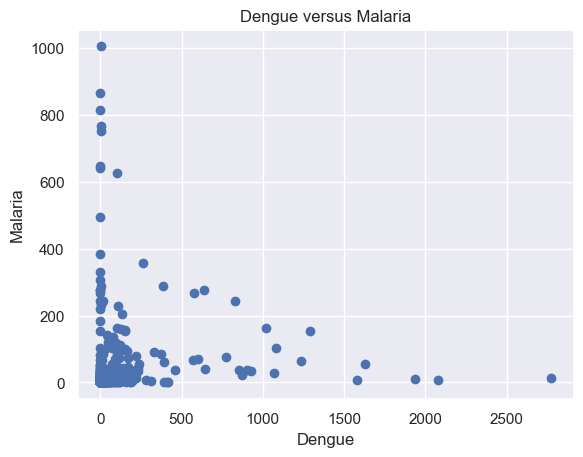

In [34]:
pl_scatter('Dengue', 'Malaria')

$ \Rightarrow $ Quan sát đồ thị, chúng ta sẽ thấy sốt rét và sốt xuất huyết thường không xuất hiện cùng với nhau, khi sốt rét tăng thì sốt xuất huyết giảm và ngược lại. Như vậy, khi một trong hai dịch bệnh này xảy ra thì chúng ta nên tập trung xử lý dịch bệnh đó, tránh dàn trải nguồn lực.

Tương quan giữa bệnh bạch cầu (Leukaemia) và ung thư não/ hệ thần kinh (Brain and nervous system cancers)

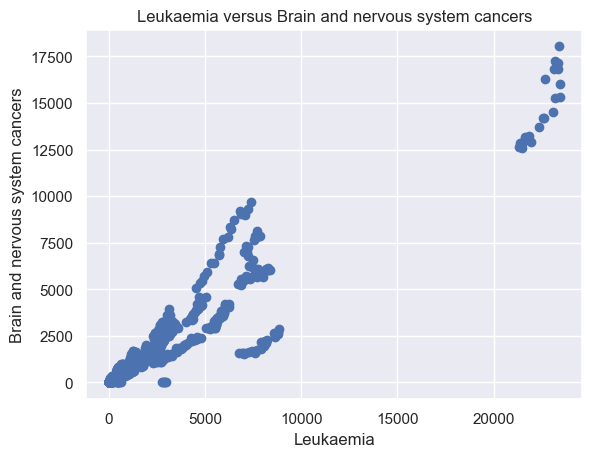

In [35]:
pl_scatter('Leukaemia', 'Brain and nervous system cancers')

Bệnh bạch cầu cũng là một loại ung thư và biểu đồ cho bệnh bạch có xu hướng tăng khi bệnh ung thư não/hệ thần kinh tăng. Có thể thấy các bệnh ung thư nói chung có xu hướng liên quan chặc chẽ với nhau.

### Câu hỏi 8: So sánh phân phối tuổi tử vong
Như chúng ta đã biết, tuổi trung bình kỳ vọng là một chỉ số quan trọng để đánh giá chất lượng cuộc sống, chỉ số phát triển con người và mức độ tiến bộ của một quốc gia, khu vực. Khi chất lượng cuộc sống được cải thiện, tuổi trung bình sẽ cao hơn và số lượng tử vong ở nhóm tuổi lớn hơn sẽ tăng lên. Chúng ta cùng tìm hiểu qua các bước sau.

In [36]:
def pl_line(arg_df):
    # lấy các giá trị cần thiết và tính tổng theo độ tuổi
    tmp_df = arg_df.iloc[:, 3:]
    tmp_df = tmp_df.groupby('Age').sum().reset_index()
    # Tính tổng và tỉ lệ của các độ tuổi
    tmp_df['Total'] = tmp_df.iloc[:, 1:].sum(axis=1)
    S = tmp_df['Total'].sum()
    tmp_df['Rate'] = tmp_df['Total'] / S
    # sắp xếp tuổi theo đúng thứ tự
    tmp_df['Age'] = tmp_df['Age'].apply(
        lambda x: '0' + x if len(x.split('-')[0]) < 2 else x)
    tmp_df = tmp_df.sort_values(by=['Age']).reset_index()
    # trả về tuổi và ti lệ
    return tmp_df[['Age', 'Rate']]


In [37]:
query_2000 = '"2000" in Year'   # query lấy dữ liệu năm 2000
query_2019 = '"2019" in Year'   # query lấy dữ liệu năm 2019
query_Canada = 'Country == "Canada"'    # query lấy dữ liệu Canada
query_Nicaragua = 'Country == "Nicaragua"'  # query lấy dữ liệu Nicaragua
query_Af1519 = 'Continent == "Africa" and Year >= "2015-01-01" and Year <= "2019-12-31"'    # query lấy dữ liệu Châu Phi từ năm 2015 - 2019
query_As1519 = 'Continent == "Asia" and Year >= "2015-01-01" and Year <= "2019-12-31"'  # query lấy dữ liệu Châu Á từ năm 2015 - 2019
query_Eu1519 = 'Continent == "Europe" and Year >= "2015-01-01" and Year <= "2019-12-31"'    # query lấy dữ liệu Châu Âu từ năm 2015 - 2019

In [38]:
# Thay đổi kiểu đồ thị
plt.rc('grid', linestyle='-', color='#e0e0e0', linewidth=1);
plt.grid(True)
plt.close()
ageShow = ['0', '1-4', '5-14', '15-24', '25-34', '35-54', '55-74', '75+']


#### Tuổi tử vong đã thay đổi như thế nào từ năm 2000 đến 2019

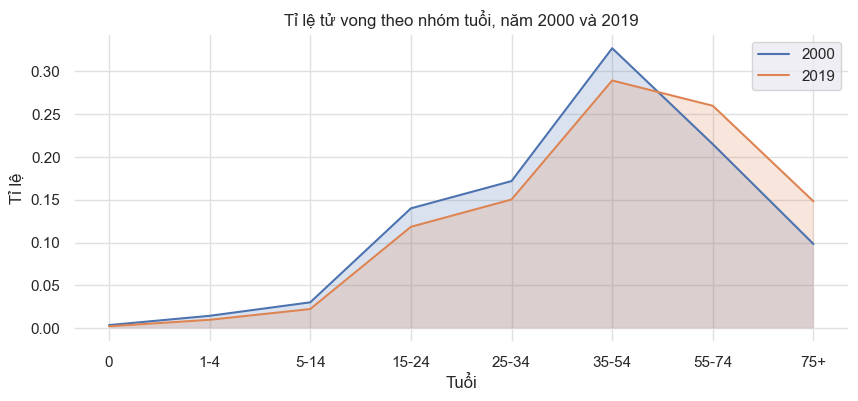

In [39]:
fig, ax = plt.subplots(figsize=(10, 4))

pl_df = pl_line(df.query(query_2000))
plt.plot(ageShow, pl_df['Rate'], label='2000')
ax.fill_between(ageShow, pl_df['Rate'], alpha=0.2)

pl_df = pl_line(df.query(query_2019))
plt.plot(ageShow, pl_df['Rate'], label='2019')
ax.fill_between(ageShow, pl_df['Rate'], alpha=0.2)

ax.set_facecolor('white')
ax.set_xlabel('Tuổi')
ax.set_ylabel('Tỉ lệ')
ax.set_title('Tỉ lệ tử vong theo nhóm tuổi, năm 2000 và 2019')
plt.legend()
plt.show()


Quan sát đồ thị có thể thấy năm 2019 so với năm 2000, tỉ lệ tử vong ở nhóm tuổi dưới 54 giảm và trên 54 tăng. Vậy tuổi thọ đã được gia tăng và chất lượng cuộc sống được cải thiện trong 19 năm qua.

#### Tuổi tử vong ở các nước khác nhau

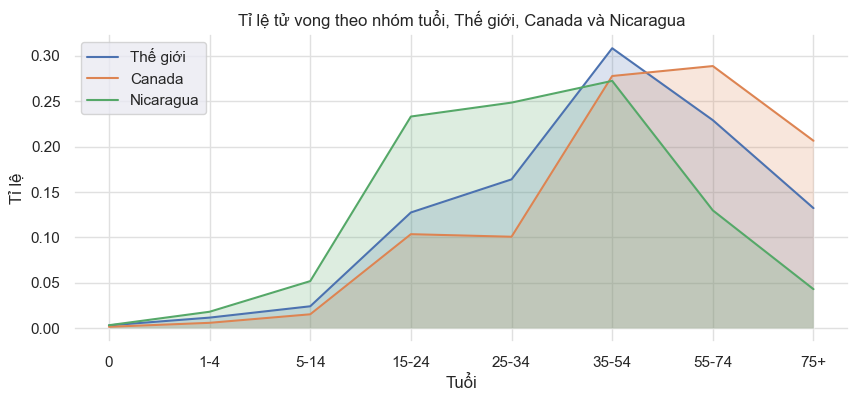

In [40]:
fig, ax = plt.subplots(figsize=(10, 4))

pl_df = pl_line(df)
plt.plot(ageShow, pl_df['Rate'], label='Thế giới')
ax.fill_between(ageShow, pl_df['Rate'], alpha=0.2)

pl_df = pl_line(df.query(query_Canada))
plt.plot(ageShow, pl_df['Rate'], label='Canada')
ax.fill_between(ageShow, pl_df['Rate'], alpha=0.2)

pl_df = pl_line(df.query(query_Nicaragua))
plt.plot(ageShow, pl_df['Rate'], label='Nicaragua')
ax.fill_between(ageShow, pl_df['Rate'], alpha=0.2)

ax.set_facecolor('white')
ax.set_xlabel('Tuổi')
ax.set_ylabel('Tỉ lệ')
ax.set_title('Tỉ lệ tử vong theo nhóm tuổi, Thế giới, Canada và Nicaragua')
plt.legend()
plt.show()


Phần lớn số ca tử vong của Nicaragua ở độ tuổi thấp còn Canada ở độ tuổi cao. Vì vậy, chất lượng cuộc sống ở Canada cao hơn Nicaragua.  

#### Tuổi tử vong ở các châu lục khác nhau trong những năm gần đây

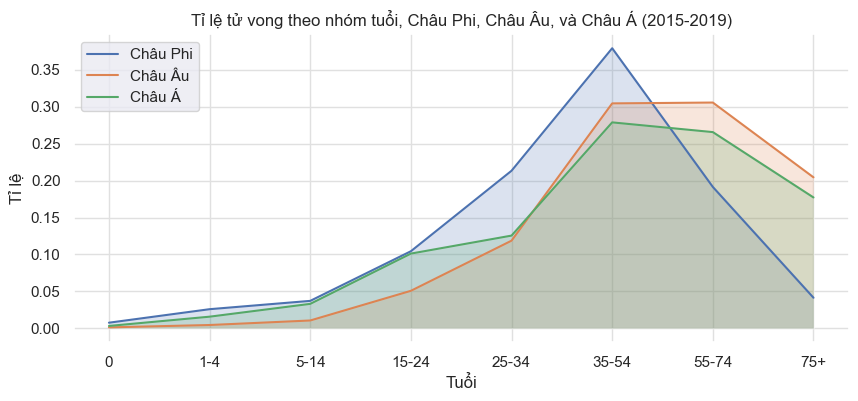

In [41]:
fig, ax = plt.subplots(figsize=(10, 4))

pl_df = pl_line(df.query(query_Af1519))
plt.plot(ageShow, pl_df['Rate'], label='Châu Phi')
ax.fill_between(ageShow, pl_df['Rate'], alpha=0.2)

pl_df = pl_line(df.query(query_Eu1519))
plt.plot(ageShow, pl_df['Rate'], label='Châu Âu')
ax.fill_between(ageShow, pl_df['Rate'], alpha=0.2)

pl_df = pl_line(df.query(query_As1519))
plt.plot(ageShow, pl_df['Rate'], label='Châu Á')
ax.fill_between(ageShow, pl_df['Rate'], alpha=0.2)

ax.set_facecolor('white')
ax.set_xlabel('Tuổi')
ax.set_ylabel('Tỉ lệ')
ax.set_title('Tỉ lệ tử vong theo nhóm tuổi, Châu Phi, Châu Âu, và Châu Á (2015-2019)')
plt.legend()
plt.show()


Châu Á có trung vị tuổi tử vong lớn hơn châu Phi nhưng nhỏ hơn châu Phi. Điều này cho châu Á có điều kiện sống tốt hơn châu Phi nhưng thấp hơn châu Âu

<hr/>